在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [85]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [ ]:
#####################################
#                 1                 #
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。
def read_csf(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
daily_engagement = read_csf('daily_engagement.csv')
project_submissions = read_csf('project_submissions.csv')

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

In [2]:
import pandas as pd
print "Hi! This is a cell. Press the ▶ button above to run it"
daily_engagement_full = pd.read_csv("daily-engagement-full.csv")


Hi! This is a cell. Press the ▶ button above to run it


AttributeError: 'DataFrame' object has no attribute 'unique'

## 修正数据类型

In [87]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        try:
            return dt.strptime(date, '%Y-%m-%d')
        except:
            print date
            raise Exception('Errors in converting to date type')
            return None
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [88]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [89]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [90]:
#####################################
#                 2                 #
#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量
def unique_accounts(table_list, key_name_in_table):
    nums = len(table_list)
    account_keys = []
    for row in table_list:
        account_key = row[key_name_in_table]
        if account_key in account_keys:
            pass
        else:
            account_keys.append(account_key)
    return nums,len(account_keys)

print unique_accounts(enrollments,'account_key')
print unique_accounts(daily_engagement,u'acct')
print unique_accounts(project_submissions,u'account_key')
                      

(1640, 1302)
(136240, 1237)
(3642, 743)


## 数据中的问题

In [91]:
#####################################
#                 3                 #
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"
for row in daily_engagement:
    if row.has_key('acct'):
        #row.update({u'account_key':row.pop('acct')})
        #teacher's way as below
        row['account_key'] = row['acct']
        del[row['acct']]

def get_unique_records(dataset):
    unique_accounts = set()
    for data in dataset:
        unique_accounts.add(data['account_key'])
    return unique_accounts
unique_enrollments = get_unique_records(enrollments)
print len(unique_enrollments)
unique_engagements = get_unique_records(daily_engagement)
print len(unique_engagements)
unique_engagements = get_unique_records(project_submissions)
print len(project_submissions)

1302
1237
3642


## 缺失的互动（Engagement）记录

In [93]:
#####################################
#                 4                 #
#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。
for row in enrollments:
    account_key = row['account_key']
    if account_key not in unique_engagements:
        print row, account_key
        break
    

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'700', u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0), u'days_to_cancel': 6} 700


## 检查更多的问题记录

In [105]:
#####################################
#                 5                 #
#####################################

## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
out_record_nums = 0
for row in enrollments:
    account_key = row['account_key']
    if account_key not in unique_engagements:
        out_record_nums+=1
print out_record_nums

681


## 追踪剩余的问题

In [106]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])

print len(udacity_test_accounts)

6


In [107]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            new_data.append(data_point)
    return new_data

In [108]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [144]:
#####################################
#                 6                 #
#####################################
from datetime import datetime
## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。
'''
{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}
'''
paid_students = {}
for enrollment in non_udacity_enrollments:
    
    if ( enrollment['cancel_date'] is None) or (enrollment['days_to_cancel'] > 7):
        paid_students[enrollment['account_key']] = enrollment['join_date']

print len(paid_students)

995


## 获取第1周的数据
获取第1周的数据

In [145]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days <7 and time_delta.days>0
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)


1293
134549
3618


In [146]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

paid_engagement_in_first_week = []
for engagement in paid_engagement:
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    engage_record_date = engagement['utc_date']
    if within_one_week(join_date, engage_record_date):
        paid_engagement_in_first_week.append(engagement)
        
print len(paid_engagement_in_first_week)

5936


## Exploring Student Engagement

In [147]:
from collections import defaultdict
d1 = dict()
d2 = defaultdict(list)
#print(d1['a'])
print(d2['a'])

[]


In [148]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)


In [149]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
print len(total_minutes_by_account)

994


In [150]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 257.578896144
Standard deviation: 353.555962679
Minimum: 0.0
Maximum: 2714.21392483


## 纠错现有的数据分析代码

In [151]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。
student_with_max_minutes = None
max_minutes = 0

for account_key, total_minute in total_minutes_by_account.items():
    if total_minute > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = account_key
print student_with_max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

619
{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'619', u'utc_date': datetime.datetime(2015, 6, 7, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 435.742711, u'projects_completed': 0, 'account_key': u'619', u'utc_date': datetime.datetime(2015, 6, 8, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 572.872452167, u'projects_completed': 0, 'account_key': u'619', u'utc_date': datetime.datetime(2015, 6, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 59.0923918333, u'projects_completed': 0, 'account_key': u'619', u'utc_date': datetime.datetime(2015, 6, 10, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'619', u'utc_date': 

## 第1周完成的课程数（Lessons）

The Mean is 257.579000
The Standard deviation is 353.556000
The Mininum is 0.000000
The Maxinum is 2714.214000


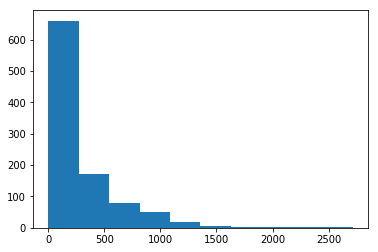

In [159]:
#####################################
#                 9                 #
#####################################
%matplotlib inline
import matplotlib.pyplot as plt

## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码
def group_data(data, key):
    group_data = defaultdict(list)
    for data_point in data:
        group_key = data_point[key]
        group_data[group_key].append(data_point)
    return group_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

def sum_grouped_items(grouped_data, field_name):
    sum_grouped_items = {}
    for key, data_point in grouped_data.items():
        sums = 0
        for each_record in data_point:
            sums += each_record[field_name]
        sum_grouped_items[key] = sums
    return sum_grouped_items

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

def desc_statistic(data, decp=3):
    # 汇总和描述关于教室所花时间的数据
    
    print "The Mean is %f" %round(np.mean(data),decp)
    print "The Standard deviation is %f" %round(np.std(data),decp)
    print "The Mininum is %f" %round(np.min(data),decp)
    print "The Maxinum is %f" %round(np.max(data),decp)
    plt.hist(data)

desc_statistic(total_minutes_by_account.values())

## 第1周的访问次数

In [153]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

for key, engagements in engagement_by_account.items():
    for data_point in engagements:
        if(data_point['num_courses_visited'] > 0):
            data_point['has_visited'] = 1
        else:
            data_point['has_visited'] = 0

total_days_visited = sum_grouped_items(engagement_by_account, 'has_visited')
desc_statistic(total_days_visited.values())

The Mean is 2.360000
The Standard deviation is 1.994000
The Mininum is 0.000000
The Maxinum is 6.000000


## 区分项目通过的学生

In [154]:
print paid_submissions[0]
print engagement_by_account['256']

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}
[{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 2, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 3, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc_date': datetime.datetime(2015, 4, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'256', u'utc

In [156]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。
'''
 - assigned_rating:  这个字段有4个可能的值:
                        blank - 项目没有被评估。
                        INCOMPLETE - 项目不符合要求。
                        PASSED - 项目符合要求。
                        DISTINCTION – 项目超出要求。
                        UNGRADED – 项目无法被评估。（例如：包括损坏的文件）
'''
subway_project_lesson_keys = ['746169184', '3176718735']
passing_accounts = set()
for submission_record in paid_submissions:
    account_key = submission_record['account_key']
    lesson_key = submission_record['lesson_key']
    if lesson_key in subway_project_lesson_keys and \
    submission_record['assigned_rating'] in ['PASSED','DISTINCTION']:
            passing_accounts.add(account_key)

print len(paid_submissions) 
print len(passing_accounts)
passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in passing_accounts:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
    
print len(passing_engagement)
print len(non_passing_engagement)

3618
647
3881
2055


## 对比两组学生数据

In [157]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。

group_by_accounts_in_passed = group_data(passing_engagement, 'account_key')
group_by_accounts_not_passed = group_data(non_passing_engagement, 'account_key')

total_time_passed = sum_grouped_items(group_by_accounts_in_passed,'total_minutes_visited')
total_time_not_passed = sum_grouped_items(group_by_accounts_not_passed,'total_minutes_visited')

print "the total vistied time for those students passed as below:"
desc_statistic(total_time_passed.values())

print "the total vistied time statistic data for those students not passed as below:"
desc_statistic(total_time_not_passed.values())

print "\n"
print "-------课程完成数数据如下 --------"
total_lessons_passed = sum_grouped_items(group_by_accounts_in_passed,'lessons_completed')
total_lessons_not_passed = sum_grouped_items(group_by_accounts_not_passed,'lessons_completed')

print "the total completed lessons for those students passed as below:"
desc_statistic(total_lessons_passed.values())

print "the total completed lessons for those students not passed as below:"
desc_statistic(total_lessons_not_passed.values())

print "\n"
print "-------访问天数 --------"
total_visited_passed = sum_grouped_items(group_by_accounts_in_passed,'has_visited')
total_visited_not_passed = sum_grouped_items(group_by_accounts_not_passed,'has_visited')

print "the total completed lessons for those students passed as below:"
desc_statistic(total_visited_passed.values())

print "the total completed lessons for those students not passed as below:"
desc_statistic(total_visited_not_passed.values())

the total vistied time for those students passed as below:
The Mean is 332.881000
The Standard deviation is 382.085000
The Mininum is 0.000000
The Maxinum is 2714.214000
the total vistied time statistic data for those students not passed as below:
The Mean is 117.174000
The Standard deviation is 235.762000
The Mininum is 0.000000
The Maxinum is 1641.368000


-------课程完成数数据如下 --------
the total completed lessons for those students passed as below:
The Mean is 1.709000
The Standard deviation is 2.739000
The Mininum is 0.000000
The Maxinum is 26.000000
the total completed lessons for those students not passed as below:
The Mean is 0.723000
The Standard deviation is 2.240000
The Mininum is 0.000000
The Maxinum is 23.000000


-------访问天数 --------
the total completed lessons for those students passed as below:
The Mean is 2.842000
The Standard deviation is 1.984000
The Mininum is 0.000000
The Maxinum is 6.000000
the total completed lessons for those students not passed as below:
The Mean is 

## 制作直方图

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

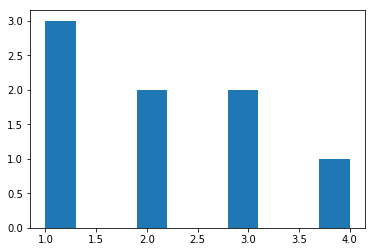

In [158]:
data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data)

The Mean is 332.881000
The Standard deviation is 382.085000
The Mininum is 0.000000
The Maxinum is 2714.214000
The Mean is 117.174000
The Standard deviation is 235.762000
The Mininum is 0.000000
The Maxinum is 1641.368000


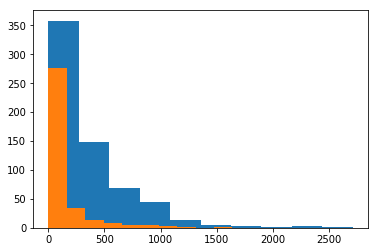

In [162]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。
desc_statistic(total_time_passed.values())
desc_statistic(total_time_not_passed.values())


The Mean is 1.709000
The Standard deviation is 2.739000
The Mininum is 0.000000
The Maxinum is 26.000000
The Mean is 0.723000
The Standard deviation is 2.240000
The Mininum is 0.000000
The Maxinum is 23.000000


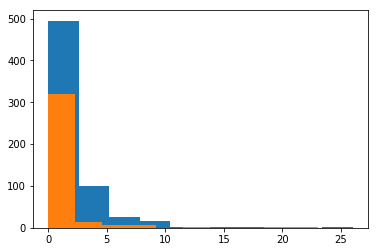

In [163]:
desc_statistic(total_lessons_passed.values())
desc_statistic(total_lessons_not_passed.values())


The Mean is 2.842000
The Standard deviation is 1.984000
The Mininum is 0.000000
The Maxinum is 6.000000
The Mean is 1.461000
The Standard deviation is 1.677000
The Mininum is 0.000000
The Maxinum is 6.000000


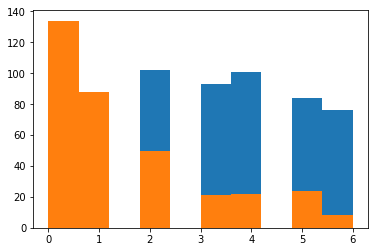

In [164]:
desc_statistic(total_visited_passed.values())
desc_statistic(total_visited_not_passed.values())

## 改进图表及分享发现

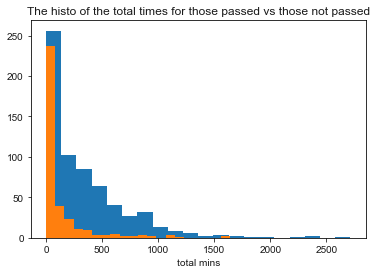

In [171]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。

import seaborn as sns

data1 = total_time_passed.values()
data2 = total_time_not_passed.values()

plt.hist(data1, bins = 20)
plt.hist(data2, bins = 20)

plt.xlabel('total mins')
plt.title("The histo of the total times for those passed vs those not passed")

sns.set(color_codes=True)